## MSDS 432 - Programming Assignment #5 Dan Avni

## Executive Summary

The purpose of this programming assignment is to provide a "real-world" demonstration of the runtime performance of three search algorithms: linear search against unsorted data, binary search againts sorted data,  and hash search. 

The $\Theta(n)$ and $O(n)$ notation captures the average-case and worst-case performance of that these algorithms respectively:

| Algorithm  | Average-Case $\Theta(n)$  | Worst-Case $\Omega(n)$  |
|-------------|:-------------:|-----|
| Linear search  |$\Theta(n)$ | $O(n)$ |   
| Binary search |$\Theta(log n)$ | $O(log n)$ |  
| Hash search      |$\Theta(nlogn)$ | $O(nlogn)$ |

We show that in practical terms the binary and hash search algorithm delivered singnificanly better runtime performance over linear search, with hash search delivering the expected superior performance. 

Overall, both binary and hash search should be considered as good options for searching large datasets, with actual choice informed by the specific use cases.

## Method and Conclusions

To demonstrate the various sort algorithm average-case performance, we prepared 100,000 data elements consisting of randomly generated 10 character string.

We search the data 25 times using each of the three search algorithms for six string positioned in various fixed offsets in the data and measure the mean runtime performance. We show the results in both tabular and bar chart for and confirm the therotical results. 


The below chart shows the avergae case results. Note that we broke the chart to two parts as the linear search results overwhelm the two other algorithm making it impossible to observe the differnce. Linear search performed 600x slower than linear and 26,600x slower than the hash search, while binary search performed 3.5x worse than hash.

<img src="./runtime3.png">

<img src="./runtime4.png">


## Implementation

In [2]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import string
import random

In [3]:
# binary search implemntation retrieved from https://github.com/egonSchiele/grokking_algorithms.git
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1

  # Item doesn't exist
  return None

In [4]:
# plain linear search implementation 
def linear_search(list, item):
  pos  = 0
  end = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while pos <= end:
    current = list[pos]
    # Found the item.
    if current == item:
      return pos
    else:
      pos = pos + 1

  # Item doesn't exist
  return None

In [5]:
# plain linear search implementation 
def hash_search(set, item):
  return (item in set)

In [6]:
# merge sort implementation - coded by the author using hands on keyboard. More 

def mergeSort(array):
    l = len(array)
    # base case of one element - no work needed
    if l < 2:
        return array
    #split the array to two and sort recursively
    mid = l//2
    array1 = mergeSort(array[:mid])
    array2 = mergeSort(array[mid:])
    
    i, i1, i2, l1, l2 = 0, 0, 0, len(array1), len(array2)
    #merge the two array using one index for each sub-array
    while i < l:
        if i1 < l1 and (i2 == l2 or array1[i1] < array2[i2]):
            array[i] = array1[i1]
            i1 = i1 + 1
        else:
            array[i] = array2[i2]
            i2 = i2 + 1
        i = i1 + i2
    return array

In [7]:
# generate random data
test_data = []
for i in range(0,100000):
    test_data.append(''.join(random.choices(string.ascii_letters, k = 10)) )
    
#ensure unique values
uniq_dict = {}
for item in test_data:
    if item in uniq_dict:
        raise Exception("test_data is not unique")
    uniq_dict[item] = 'found'

In [8]:
test_data_sorted = mergeSort(test_data.copy())

In [9]:
test_data_set = {key for key in test_data}

In [10]:
search_items = [test_data[i-1] for i in [10000, 30000, 50000, 70000, 90000, 100000]]

In [11]:
search_methods = [linear_search, binary_search, hash_search]
search_methods_data = {linear_search: test_data, 
                       binary_search: test_data_sorted, 
                       hash_search: test_data_set}

#prepare an empty data frame with the desired column names
test_results_col_names = ['search_method', 'search_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

#iterate over the possible sort methods compture runtime length in milliseconds
for i in range(0,25):
    for search_method in search_methods:
            start   = time.time()
            for search_item in search_items:
                search_method(search_methods_data[search_method], search_item)
                search_ms = (time.time() - start) * 1000
            #insert the results into a new dataframe record
            test_results.loc[len(test_results)] = [search_method.__name__, search_ms]

In [48]:
test_results_mean = test_results.groupby(['search_method'], as_index=False)['search_ms'].mean()

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [49]:
#plain text data dump of the test results
test_results_mean

,search_method,search_ms
0,binary_search,0.058165
1,hash_search,0.017509
2,linear_search,48.075809


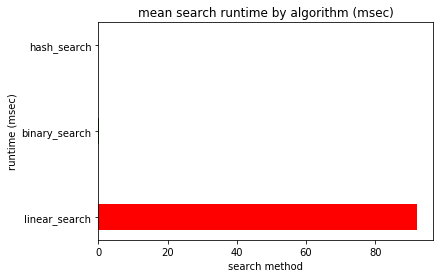

In [69]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(6,4))
plt.barh(test_results.search_method, test_results.search_ms, height=0.3, color=['red', 'green', 'blue'])
plt.xlabel('search method')
plt.ylabel('runtime (msec)')
plt.title('mean search runtime by algorithm (msec)')
plt.show()

In [57]:
test_results_mean_fast = test_results_mean[test_results_mean['search_method'] != 'linear_search']

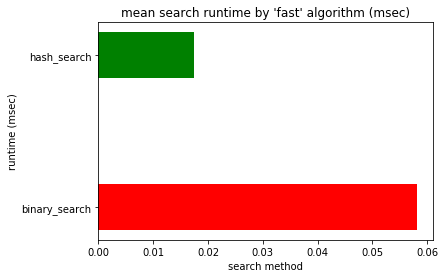

In [70]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(6,4))
plt.barh(test_results_mean_fast.search_method, test_results_mean_fast.search_ms, height=0.3, color=['red', 'green'])
plt.xlabel('search method')
plt.ylabel('runtime (msec)')
plt.title('mean search runtime by \'fast\' algorithm (msec)')
plt.show()